# Code sample from the article

This notebook contains the code used by the part of the article "How to initialize a neural net?"

In [21]:
import torch
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
import numpy as np

In [111]:
T = 50
N = 4048

## Difference between theoretical and actual gain for normal init

[1.00e+00 1.30e+03 2.58e+06 5.10e+09 1.06e+13]
[1.00e+00 2.02e+03 4.10e+06 8.29e+09 1.68e+13]


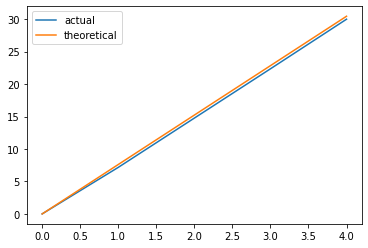

In [80]:
# x is an input vector (random with mean of 0 and standard deviation of 1)
x = torch.randn(N)

# linear is a linear layer with output of size 512 (matrix 512x512)
linear = torch.nn.Linear(N, N)

# we initialize the weight of the linear layer with random number (mean of 0 and standard deviation of 1)
torch.nn.init.normal_(linear.weight, mean=0, std=1)
torch.nn.init.zeros_(linear.bias)

mean = []
var = []
# We simulate the foward pass of a neural net with 50 layers

for i in range(T):
    # record stats
    mean.append(x.mean())
    var.append(x.std()**2)

    # apply layer
    x = F.relu(linear(x))
    
    # next layer
    torch.nn.init.normal_(linear.weight, mean=0, std=1)
    torch.nn.init.zeros_(linear.bias)

np.set_printoptions(precision=2)

# We get exploding gradient (not a number results)

rnge = np.linspace(0, T - 1, T)
fx = lambda t: (N/2)**t

# print variances
print(np.array([i.detach().numpy() for i in var]))
print(fx(rnge))

# plot variances
act = plt.plot(np.log(var), label = "actual")
theo = plt.plot(rnge, np.log(fx(rnge)), label = "theoretical")
plt.legend()

## Difference between theoretical and actual gain for normal init: Attempt to fix

[1.01e+00 1.31e+03 2.64e+06 5.41e+09 1.07e+13]
[1.00e+00 2.02e+03 4.10e+06 8.29e+09 1.68e+13]


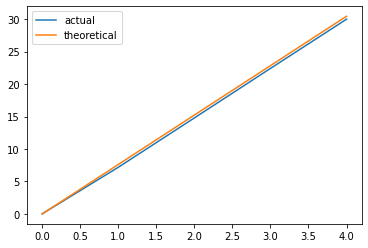

In [81]:
# x is an input vector (random with mean of 0 and standard deviation of 1)
x = torch.randn(N)

# linear is a linear layer with output of size 512 (matrix 512x512)
linear = torch.nn.Linear(N, N)

# we initialize the weight of the linear layer with random number (mean of 0 and standard deviation of 1)
torch.nn.init.normal_(linear.weight, mean=0, std=1)
torch.nn.init.zeros_(linear.bias)

mean = []
var = []
# We simulate the foward pass of a neural net with 50 layers

for i in range(T):
    # record stats
    mean.append(x.mean())
    var_i = ((x-mean[-1])**2).sum() / (x.numel() - 1)
    var.append(var_i)
    
    # apply layer
    x = F.relu(linear(x))
    
    # next layer
    torch.nn.init.normal_(linear.weight, mean=0, std=1)
    torch.nn.init.zeros_(linear.bias)

np.set_printoptions(precision=2)

# We get exploding gradient (not a number results)

rnge = np.linspace(0, T - 1, T)
fx = lambda t: (N/2)**t

# print variances
print(np.array([i.detach().numpy() for i in var]))
print(fx(rnge))

# plot variances
act = plt.plot(np.log(var), label = "actual")
theo = plt.plot(rnge, np.log(fx(rnge)), label = "theoretical")
plt.legend()

## Screwed up Kaiming :D

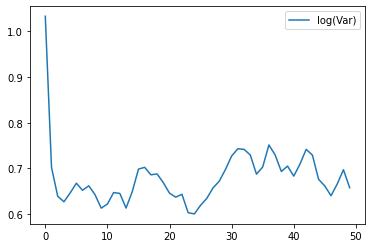

In [115]:
# x is an input vector (random with mean of 0 and standard deviation of 1)
x = torch.randn(N)

# linear is a linear layer with output of size 512 (matrix 512x512)
linear = torch.nn.Linear(N, N)

with torch.no_grad():
    # We multiply the random number by math.sqrt(2/512)
    linear.weight = torch.nn.Parameter(linear.weight * math.sqrt(2 / N))

# We simulate the foward pass of a neural net with 50 layers
mean = []
var = []
np.set_printoptions(precision=20)

for i in range(T):
    mean.append(x.mean())
    var.append(x.std()**2)

    with torch.no_grad():
        # We multiply the random number by math.sqrt(2/512)
        linear = torch.nn.Linear(N, N)
        torch.nn.init.normal_(linear.weight, mean=0, std=1)
        linear.weight = torch.nn.Parameter(linear.weight * math.sqrt(2 / N))
        #linear.bias.zero_()

    x = F.relu(linear(x))

mean = np.array([i.detach().numpy() for i in mean])
var = np.array([i.detach().numpy() for i in var])

mean = plt.plot(var, label = "log(Var)")
# theo = plt.plot(rnge, np.log(fx(rnge)), label = "theoretical")
plt.legend()

In [ ]:
## Variance of sum of products

In [121]:
var = []
# Torch.randn generates numbers from a standard distribution (mean of 0 and std of 1)
for i in range(10000):
    x = torch.randn(512)
    W = torch.randn(512,512)

    # Each element of the y vector will be calculated by the sum of 512 product 
    # (each product is between a weight of W and an input of x, both independant and from normal distribution)
    y = x @ W

    # What is the variance of a sum of 512 elements (each from a stantard distrib with a variance of 1)?
    # Answer: it should be around 512
    var.append(y.var().item())
    # print(f'Variance of y vector: {y.var()}')

    # We know that the standard deviation is the square root of the variance. 
    # So standard deviation of y should be close to the square root of 512
    # print(f'Standard deviation of y vector: {y.std()}.')
    # print(f'Should be close to square root of vector size: {math.sqrt(512)}')
print(np.mean(var))

512.0442338897705
